
    ## Contexto do Problema
    O objetivo desta análise é prever a renda de indivíduos com base em características como idade, nível de educação e outras variáveis. 
    Para isso, utilizaremos um modelo de regressão múltipla, que permite estimar a relação entre uma variável dependente (renda) e várias 
    variáveis independentes.

    ### Transformações em \(X\) e \(Y\)
    As transformações são úteis para:
    - Linearizar relações não lineares entre as variáveis.
    - Reduzir heterocedasticidade (quando a variância dos resíduos não é constante).
    - Normalizar distribuições para melhorar o ajuste do modelo.

    Por exemplo, aplicar o logaritmo a variáveis positivas pode estabilizar a variância e linearizar relações exponenciais.
    

# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [8]:
# Bibliotecas externas de manipulação e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para estatísticas
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [11]:
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [12]:
y, X = patsy.dmatrices(f'tip ~ sex + smoker + time + net_bill', tips)
reg = sm.OLS(y,X).fit()

In [13]:
tips['res'] = reg.resid

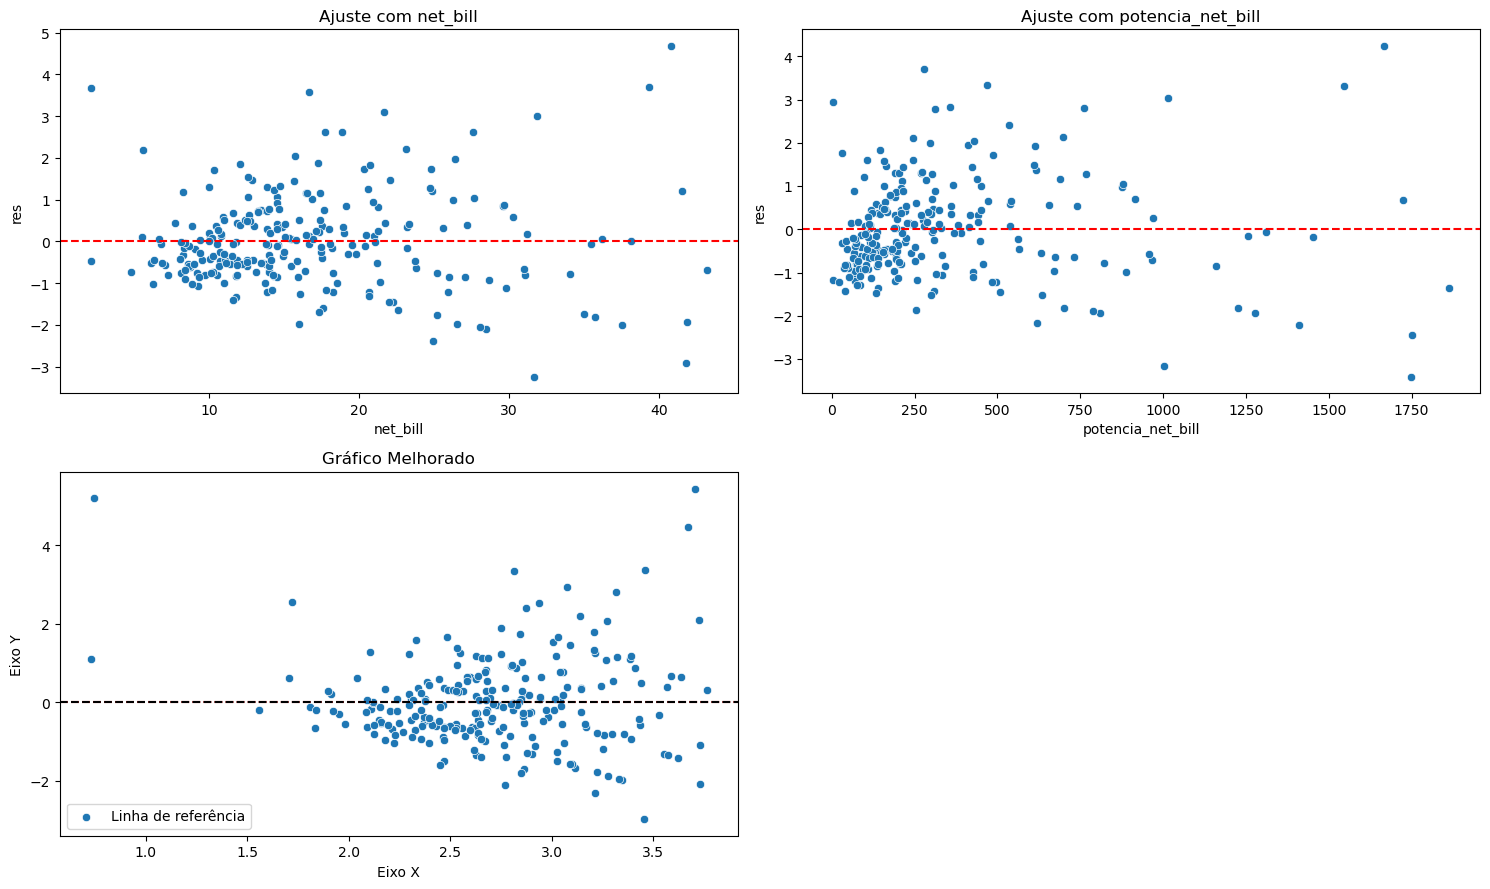

In [14]:
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['potencia_net_bill'] = np.power(tips['net_bill'], 2)

lista_de_ajustes = ['net_bill', 'potencia_net_bill', 'log_net_bill']
coordenadas = [(0, 0), (0, 1), (1, 0)]
lista_de_sumarios = []
fig, axes = plt.subplots(2, 2, figsize=(15, 9))


for ajuste, coord,  in zip(lista_de_ajustes, coordenadas):
    
    y, X = patsy.dmatrices(f'tip ~ sex + smoker + time + {ajuste}', tips)
    reg = sm.OLS(y, X).fit()
    tips['res'] = reg.resid
    lista_de_sumarios.append(reg.summary())

    row, col = coord

   
    sns.scatterplot(x=tips[ajuste], y='res', data=tips, ax=axes[row, col])

    # Adicionando linha horizontal
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_title(f'Ajuste com {ajuste}')


axes[1, 1].remove()

plt.tight_layout()

plt.title('Gráfico Melhorado')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.axhline(0, color='black', linestyle='--')
plt.legend(['Linha de referência'])
plt.show()
                    



In [15]:
dicionario_de_sumarios = {}
for i, sumario in enumerate(lista_de_sumarios):
    dicionario_de_sumarios[f'Ajuste com {lista_de_ajustes[i]}'] = sumario

dicionario_de_sumarios['Ajuste com net_bill']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           2.64e-20
Time:                        13:59:43   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
dicionario_de_sumarios['Ajuste com log_net_bill']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     25.06
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           2.41e-17
Time:                        13:59:43   Log-Likelihood:                -382.22
No. Observations:                 244   AIC:                             774.4
Df Residuals:                     239   BIC:                             791.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3107      0.469     -2.794      0.006      -2.235      -0.387
sex[T.Female]     -0.0076      0.161     -0.047      0.963      -0.325       0.310
smoker[T.No]       0.0472      0.155      0.305      0.760      -0.257       0.352
time[T.Dinner]     0.0882      0.173      0.510      0.611      -0.253       0.429
log_net_bill       1.5559      0.161      9.684      0.000       1.239       1.872
==============================================================================
Omnibus:                       73.614   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.149
Skew:                           1.299   Prob(JB):                     2.59e-48
Kurtosis:                       6.848   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
dicionario_de_sumarios['Ajuste com potencia_net_bill']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     26.29
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           4.44e-18
Time:                        13:59:43   Log-Likelihood:                -380.46
No. Observations:                 244   AIC:                             770.9
Df Residuals:                     239   BIC:                             788.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.0847      0.206     10.101      0.000       1.678       2.491
sex[T.Female]        -0.0296      0.160     -0.185      0.853      -0.344       0.285
smoker[T.No]          0.1727      0.154      1.118      0.265      -0.132       0.477
time[T.Dinner]        0.1041      0.171      0.607      0.544      -0.234       0.442
potencia_net_bill     0.0021      0.000      9.931      0.000       0.002       0.003
==============================================================================
Omnibus:                       24.609   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.345
Skew:                           0.658   Prob(JB):                     3.48e-08
Kurtosis:                       4.283   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

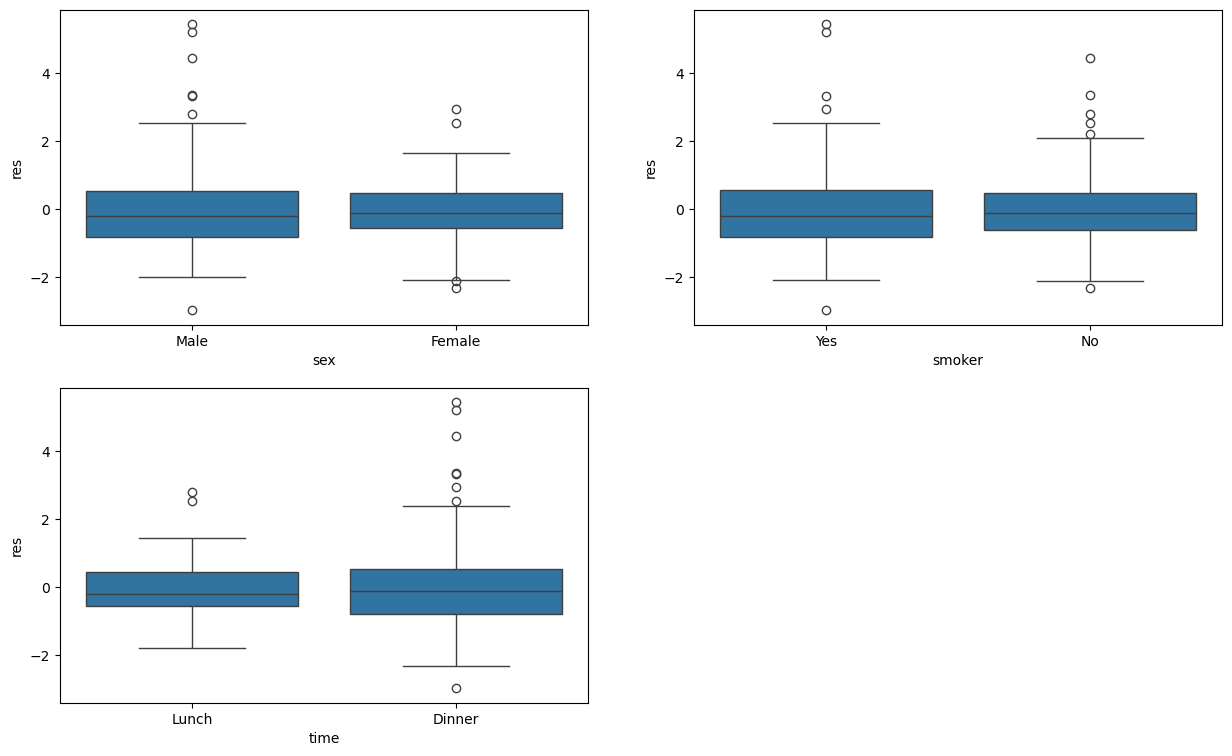

In [18]:
fig, axes = plt.subplots(2,2, figsize=[15,9])

sns.boxplot(x='sex', y='res', data = tips, ax =axes[0,0])
sns.boxplot(x='smoker', y='res', data = tips, ax=axes[0,1])
sns.boxplot(x='time', y='res', data = tips, ax=axes[1,0])

axes[1,1].remove()

In [19]:
y, X = patsy.dmatrices(f'tip ~ net_bill', tips)
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        13:59:44   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

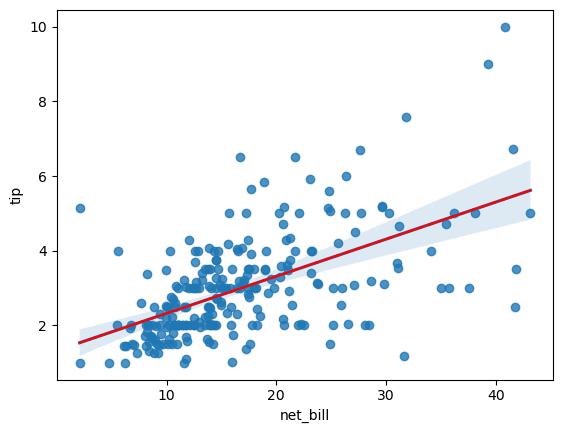

In [20]:
sns.regplot(x = 'net_bill', y = 'tip', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

In [21]:
tips['pred_tip'] = reg.fittedvalues
previsao_de_gorjeta = tips[['pred_tip', 'tip']].corr().iloc[0,1]**2

Resposta: Todas as variáveis com excessão de 'net_bill', possuem um valor de P>|t| superior a 5%, por esta análise e análise das visualizações em boxplot, foi definido que somente iremos trabalhar com uma variável explicativa, sendo 'net_bill'. Nenhuma transformação foi feita na variável x, visto que nenhuma soluciona o problema da distribuição de resíduos e afetam negativamente o R-Quadrado

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [22]:
tips['tip_pct'] = (tips['tip'] / tips['log_net_bill']) * 100

In [23]:
y,X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill', tips)
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.314
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.265
Time:                        13:59:44   Log-Likelihood:                -1317.7
No. Observations:                 244   AIC:                             2645.
Df Residuals:                     239   BIC:                             2663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         97.0972     11.534      8.419      0.000      74.377     119.818
sex[T.Female]     -1.9417      7.442     -0.261      0.794     -16.602      12.719
smoker[T.No]      -4.9682      7.175     -0.692      0.489     -19.103       9.167
time[T.Dinner]     6.7886      8.005      0.848      0.397      -8.981      22.559
net_bill           0.7323      0.444      1.648      0.101      -0.143       1.607
==============================================================================
Omnibus:                      320.337   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35126.852
Skew:                           5.651   Prob(JB):                         0.00
Kurtosis:                      60.683   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

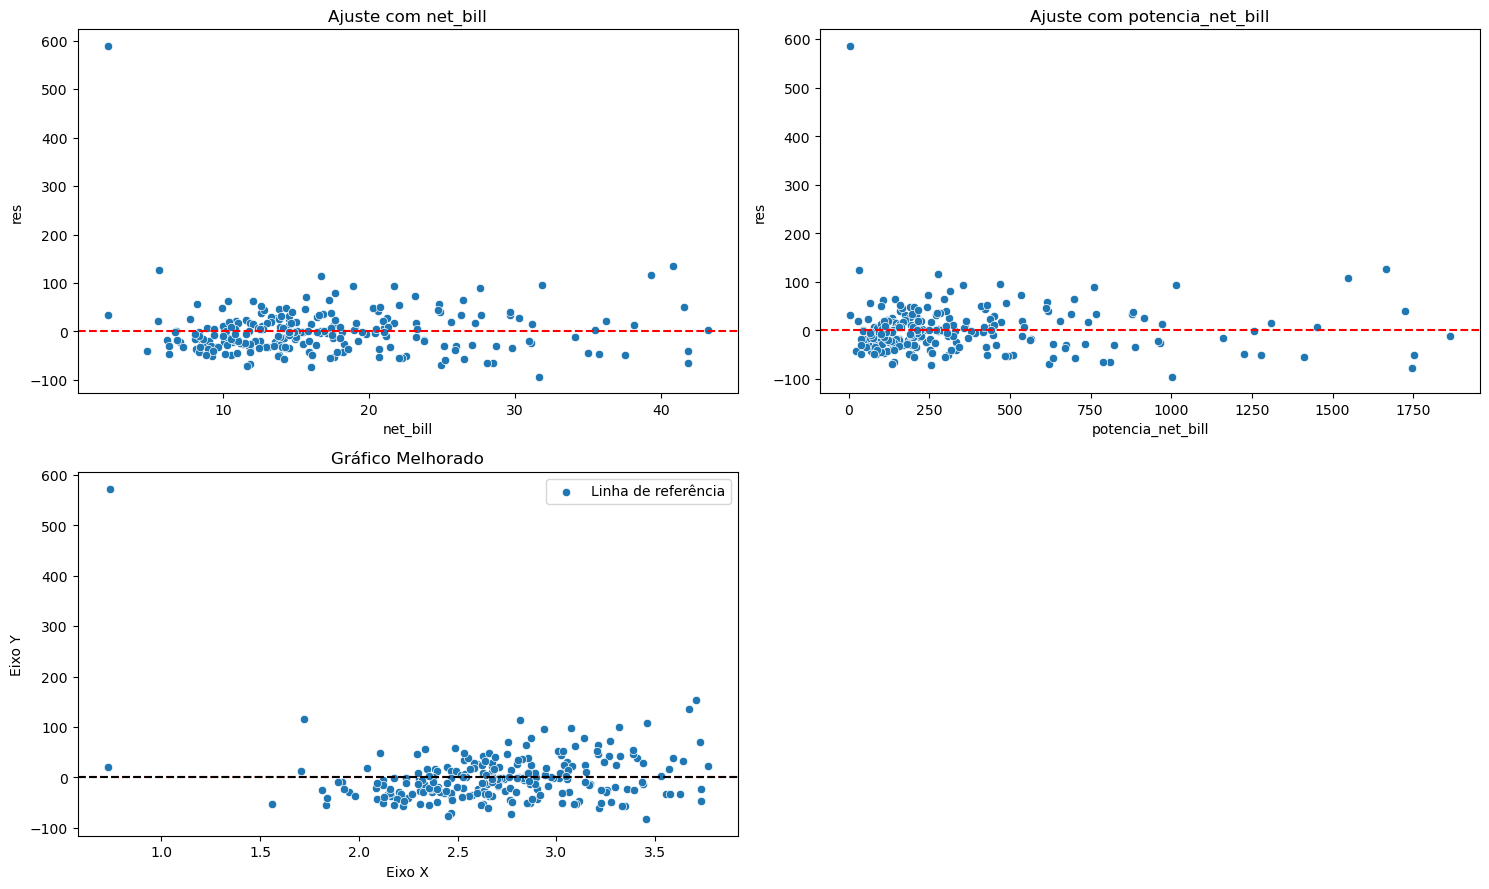

In [24]:
dicionario_de_sumarios = {}
lista_de_sumarios = []

fig, axes = plt.subplots(2, 2, figsize=(15, 9))
for ajuste, coord in zip(lista_de_ajustes, coordenadas ):
    
    y, X = patsy.dmatrices(f'tip_pct ~ sex + smoker + time + {ajuste}', tips)
    reg = sm.OLS(y, X).fit()
    tips['res'] = reg.resid
    lista_de_sumarios.append(reg.summary())

    row, col = coord

   
    sns.scatterplot(x=tips[ajuste], y='res', data=tips, ax=axes[row, col])

    # Adicionando linha horizontal
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_title(f'Ajuste com {ajuste}')


axes[1, 1].remove()

plt.tight_layout()

plt.title('Gráfico Melhorado')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.axhline(0, color='black', linestyle='--')
plt.legend(['Linha de referência'])
plt.show()
        

In [25]:
dicionario_de_sumarios = {}
for i, sumario in enumerate(lista_de_sumarios):
    dicionario_de_sumarios[f'Ajuste com {lista_de_ajustes[i]}'] = sumario

dicionario_de_sumarios['Ajuste com net_bill']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.314
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.265
Time:                        13:59:44   Log-Likelihood:                -1317.7
No. Observations:                 244   AIC:                             2645.
Df Residuals:                     239   BIC:                             2663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         97.0972     11.534      8.419      0.000      74.377     119.818
sex[T.Female]     -1.9417      7.442     -0.261      0.794     -16.602      12.719
smoker[T.No]      -4.9682      7.175     -0.692      0.489     -19.103       9.167
time[T.Dinner]     6.7886      8.005      0.848      0.397      -8.981      22.559
net_bill           0.7323      0.444      1.648      0.101      -0.143       1.607
==============================================================================
Omnibus:                      320.337   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35126.852
Skew:                           5.651   Prob(JB):                         0.00
Kurtosis:                      60.683   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
dicionario_de_sumarios['Ajuste com log_net_bill']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6387
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.635
Time:                        13:59:45   Log-Likelihood:                -1319.0
No. Observations:                 244   AIC:                             2648.
Df Residuals:                     239   BIC:                             2666.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        113.2708     21.811      5.193      0.000      70.303     156.238
sex[T.Female]     -3.5192      7.488     -0.470      0.639     -18.270      11.232
smoker[T.No]      -6.0455      7.191     -0.841      0.401     -20.212       8.121
time[T.Dinner]     9.0535      8.041      1.126      0.261      -6.788      24.894
log_net_bill      -1.5802      7.470     -0.212      0.833     -16.295      13.135
==============================================================================
Omnibus:                      303.860   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27086.585
Skew:                           5.216   Prob(JB):                         0.00
Kurtosis:                      53.551   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
dicionario_de_sumarios['Ajuste com potencia_net_bill']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.777
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.134
Time:                        13:59:45   Log-Likelihood:                -1316.7
No. Observations:                 244   AIC:                             2643.
Df Residuals:                     239   BIC:                             2661.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           101.6730      9.576     10.618      0.000      82.809     120.537
sex[T.Female]        -1.7099      7.405     -0.231      0.818     -16.298      12.878
smoker[T.No]         -4.2818      7.166     -0.597      0.551     -18.399       9.835
time[T.Dinner]        6.5296      7.953      0.821      0.412      -9.138      22.197
potencia_net_bill     0.0214      0.010      2.133      0.034       0.002       0.041
==============================================================================
Omnibus:                      318.939   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34747.981
Skew:                           5.607   Prob(JB):                         0.00
Kurtosis:                      60.377   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
y, X = patsy.dmatrices(f'tip_pct ~ np.power(net_bill, 2)', tips)
reg = sm.OLS(y, X).fit()

In [29]:
tips['pred_tip_pct'] = reg.fittedvalues
previsao_porcentagem_da_gorjeta = tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2

print(f'Coêficiente de determinação da previsão de gorjeta é: {previsao_de_gorjeta}' if previsao_de_gorjeta > previsao_porcentagem_da_gorjeta else print(f'Coêficiente de determinação da previsão de porcentagem da gorjeta é: {previsao_porcentagem_da_gorjeta}'))

Coêficiente de determinação da previsão de gorjeta é: 0.33254073123237093


Resposta: Todas as variáveis com excessão de 'net_bill' em um dos cenários, possuem um valor de P>|t| superior a 5%, por esta análise e análise das visualizações em boxplot, foi definido que somente iremos trabalhar com uma variável explicativa, sendo 'net_bill'. A transformação aplicada na variável x foi o polinômio de segundo grau, já que esta é a unica maneira de apresentar alguma das variáveis explicativas em condições satisfatórias. O coeficiente de determinação do primeiro modelo é superior ao criado nesta segunda atividade.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [30]:
previsao_de_renda = pd.read_csv('./input/previsao_de_renda.csv')
previsao_de_renda.dropna(inplace=True)

y, X = patsy.dmatrices('renda ~ tempo_emprego + sexo + posse_de_veiculo + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', previsao_de_renda)
reg = sm.OLS(y, X).fit()
reg.summary()

FileNotFoundError: [Errno 2] No such file or directory: './input/previsao_de_renda.csv'

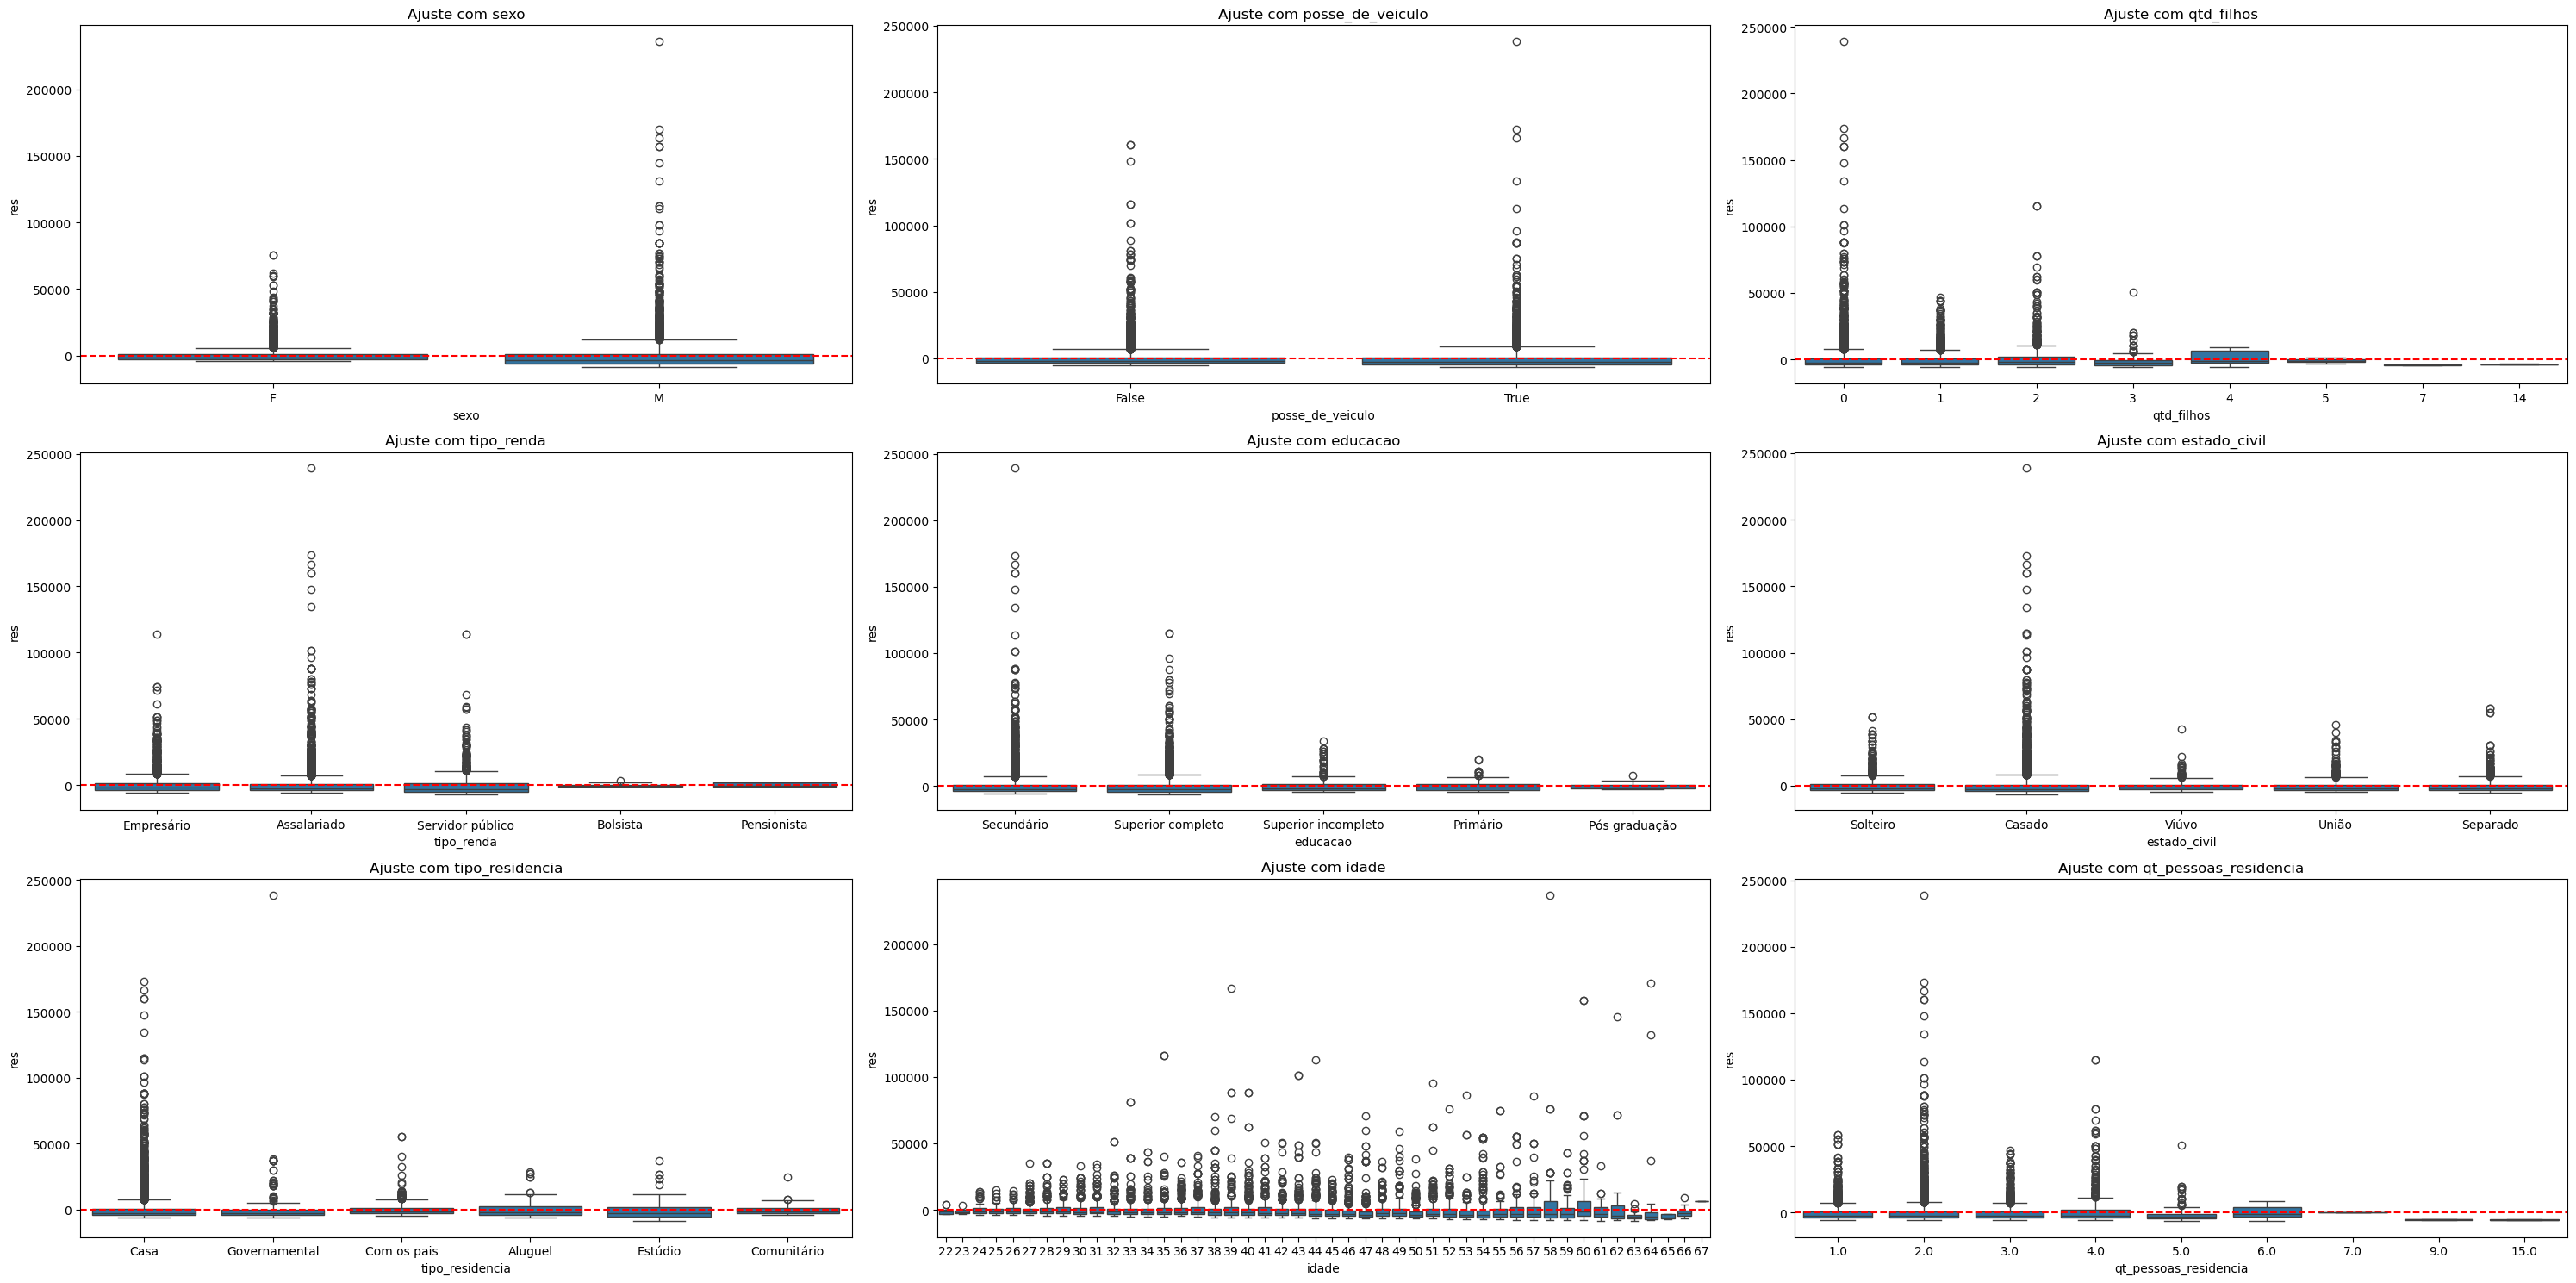

In [284]:
lista_de_ajustes = ['sexo', 'posse_de_veiculo' , 'qtd_filhos' , 'tipo_renda' , 'educacao' , 'estado_civil' , 'tipo_residencia' , 'idade' , 'qt_pessoas_residencia']

fig, axes = plt.subplots(3, 3, figsize=(30, 15))
axes = axes.flatten()

for i, ajuste in enumerate(lista_de_ajustes):

    y, X = patsy.dmatrices(f"renda ~ {ajuste}", previsao_de_renda)
    reg = sm.OLS(y, X).fit()
    previsao_de_renda['res'] = reg.resid

    sns.boxplot(
        x=previsao_de_renda[ajuste],
        y=previsao_de_renda['res'],
        data=previsao_de_renda,
        ax=axes[i],
    )
    axes[i].axhline(y=0, color="r", linestyle="--")
    axes[i].set_title(f"Ajuste com {ajuste}")


plt.tight_layout()

plt.title('Gráfico Melhorado')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.axhline(0, color='black', linestyle='--')
plt.legend(['Linha de referência'])
plt.show()
                    

In [239]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + estado_civil ', previsao_de_renda, return_type='dataframe')
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     446.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:00   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12421   BIC:                         2.593e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2505.2324    120.591     20.775      0.000    2268.855    2741.610
estado_civil[T.Separado] -1113.8274    313.514     -3.553      0.000   -1728.363    -499.292
estado_civil[T.Solteiro] -1024.4275    225.753     -4.538      0.000   -1466.939    -581.916
estado_civil[T.União]    -1236.2140    282.958     -4.369      0.000   -1790.856    -681.572
estado_civil[T.Viúvo]    -2248.2521    463.234     -4.853      0.000   -3156.262   -1340.242
tempo_emprego              512.1667     10.953     46.760      0.000     490.697     533.636
==============================================================================
Omnibus:                    17007.663   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7666235.993
Skew:                           7.698   Prob(JB):                         0.00
Kurtosis:                     123.701   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

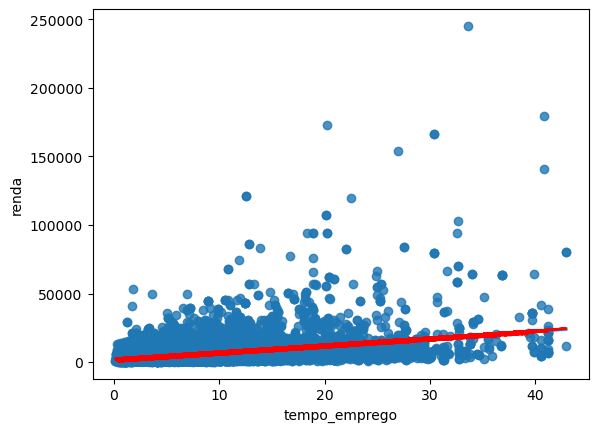

In [240]:
sns.regplot(x= 'tempo_emprego', y='renda', data=previsao_de_renda)
plt.plot(previsao_de_renda['tempo_emprego'], reg.fittedvalues, 'r,--')

In [ ]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + estado_civil ', previsao_de_renda, return_type='dataframe')
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     446.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:02   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12421   BIC:                         2.593e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2505.2324    120.591     20.775      0.000    2268.855    2741.610
estado_civil[T.Separado] -1113.8274    313.514     -3.553      0.000   -1728.363    -499.292
estado_civil[T.Solteiro] -1024.4275    225.753     -4.538      0.000   -1466.939    -581.916
estado_civil[T.União]    -1236.2140    282.958     -4.369      0.000   -1790.856    -681.572
estado_civil[T.Viúvo]    -2248.2521    463.234     -4.853      0.000   -3156.262   -1340.242
tempo_emprego              512.1667     10.953     46.760      0.000     490.697     533.636
==============================================================================
Omnibus:                    17007.663   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7666235.993
Skew:                           7.698   Prob(JB):                         0.00
Kurtosis:                     123.701   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
previsao_de_renda.loc[X.index, 'res'] = reg.resid

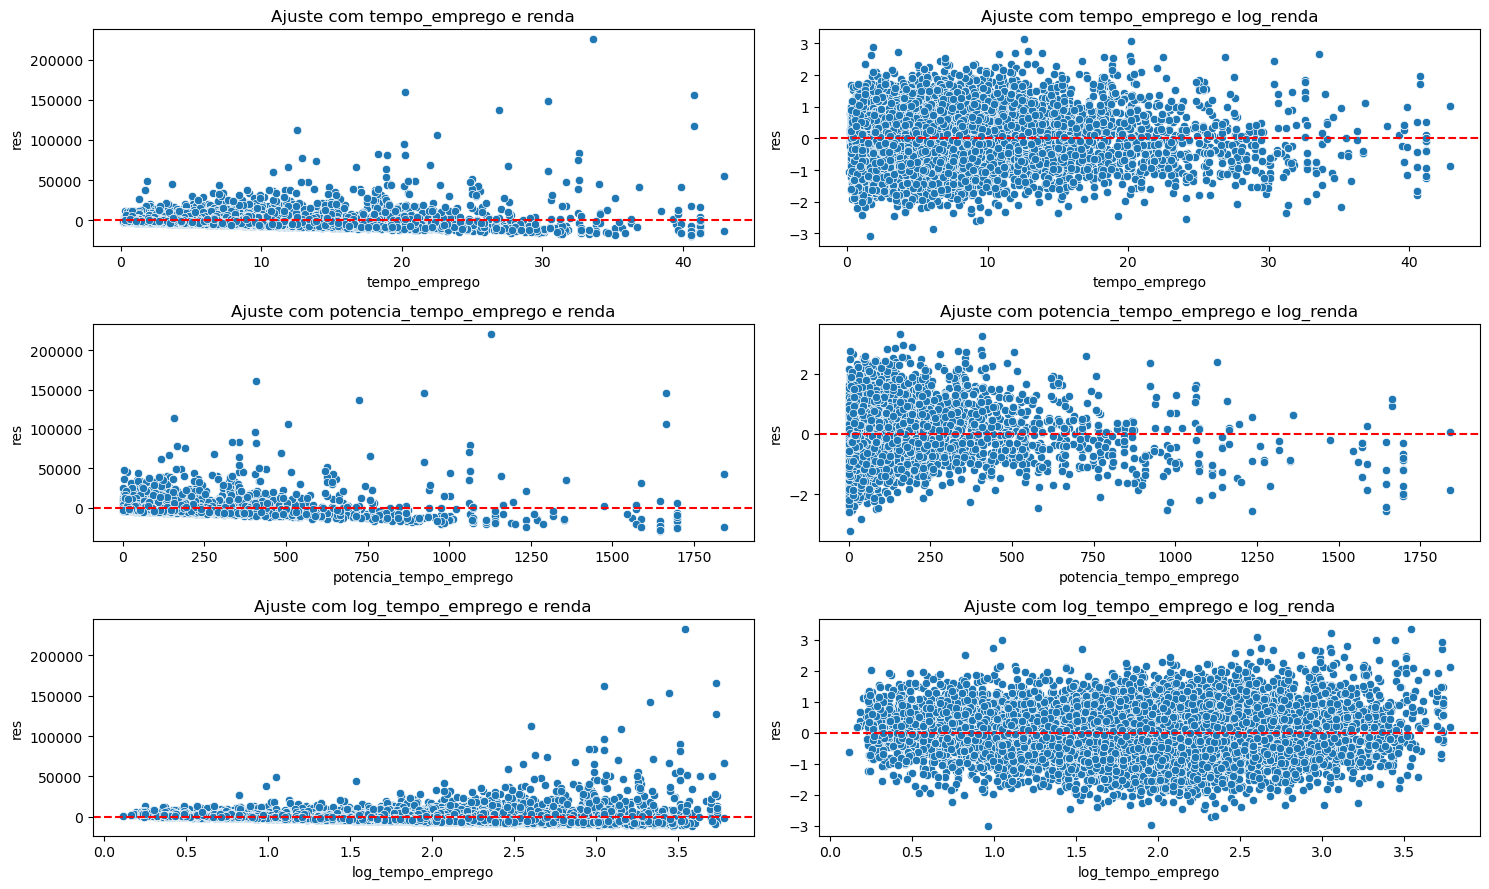

In [287]:
previsao_de_renda["log_tempo_emprego"] = np.log(previsao_de_renda["tempo_emprego"] + 1)
previsao_de_renda["potencia_tempo_emprego"] = np.power(
    previsao_de_renda["tempo_emprego"], 2
)

previsao_de_renda["log_renda"] = np.log(previsao_de_renda["renda"] + 1)


lista_de_ajustes = ["tempo_emprego", "potencia_tempo_emprego", "log_tempo_emprego"]
lista_de_ajustes_1 = ["renda", "log_renda"]
lista_de_sumarios_previsao_de_renda = []

linhas, colunas = len(lista_de_ajustes), len(lista_de_ajustes_1)

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 9))
axes = axes.flatten()

for indice, (ajuste, ajuste_1) in enumerate(
    [(aj1, aj2) for aj1 in lista_de_ajustes for aj2 in lista_de_ajustes_1]
):

    y, X = patsy.dmatrices(f"{ajuste_1} ~ {ajuste} + estado_civil", previsao_de_renda)
    reg = sm.OLS(y, X).fit()
    previsao_de_renda['res'] = reg.resid
    lista_de_sumarios_previsao_de_renda.append(reg.summary())

    sns.scatterplot(
        x=previsao_de_renda[ajuste],
        y=previsao_de_renda['res'],
        data=previsao_de_renda,
        ax=axes[indice],
    )
    axes[indice].axhline(y=0, color="r", linestyle="--")
    axes[indice].set_title(f"Ajuste com {ajuste} e {ajuste_1}")


plt.tight_layout()

plt.title('Gráfico Melhorado')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.axhline(0, color='black', linestyle='--')
plt.legend(['Linha de referência'])
plt.show()
                    

In [ ]:
lista_de_sumarios_previsao_de_renda

[<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  renda   R-squared:                       0.152
 Model:                            OLS   Adj. R-squared:                  0.152
 Method:                 Least Squares   F-statistic:                     446.7
 Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
 Time:                        21:18:02   Log-Likelihood:            -1.2960e+05
 No. Observations:               12427   AIC:                         2.592e+05
 Df Residuals:                   12421   BIC:                         2.593e+05
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------

In [245]:
dicionario_de_sumarios_previsao_de_renda = {}

for i, (ajuste, ajuste_1) in enumerate(
    [(aj1, aj2) for aj1 in lista_de_ajustes for aj2 in lista_de_ajustes_1]
):
    dicionario_de_sumarios_previsao_de_renda[f'Ajuste com {ajuste} e {ajuste_1}'] = lista_de_sumarios_previsao_de_renda[i]

In [246]:
dicionario_de_sumarios_previsao_de_renda['Ajuste com log_tempo_emprego e log_renda']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     474.6
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:02   Log-Likelihood:                -15226.
No. Observations:               12427   AIC:                         3.046e+04
Df Residuals:                   12421   BIC:                         3.051e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.4042      0.020    361.682      0.000       7.364       7.444
estado_civil[T.Separado]    -0.0776      0.032     -2.460      0.014      -0.139      -0.016
estado_civil[T.Solteiro]    -0.0651      0.023     -2.863      0.004      -0.110      -0.021
estado_civil[T.União]       -0.1153      0.028     -4.046      0.000      -0.171      -0.059
estado_civil[T.Viúvo]       -0.1779      0.047     -3.815      0.000      -0.269      -0.086
log_tempo_emprego            0.4696      0.010     48.226      0.000       0.451       0.489
==============================================================================
Omnibus:                       25.135   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.236
Skew:                           0.110   Prob(JB):                     3.31e-06
Kurtosis:                       3.013   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
dicionario_de_sumarios_previsao_de_renda['Ajuste com log_tempo_emprego e renda']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     304.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.15e-308
Time:                        21:18:02   Log-Likelihood:            -1.2991e+05
No. Observations:               12427   AIC:                         2.598e+05
Df Residuals:                   12421   BIC:                         2.599e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -829.4395    208.473     -3.979      0.000   -1238.078    -420.801
estado_civil[T.Separado]  -820.2249    321.286     -2.553      0.011   -1449.996    -190.454
estado_civil[T.Solteiro]  -720.1016    231.515     -3.110      0.002   -1173.908    -266.295
estado_civil[T.União]    -1073.2029    290.159     -3.699      0.000   -1641.960    -504.445
estado_civil[T.Viúvo]    -1967.1244    474.761     -4.143      0.000   -2897.729   -1036.520
log_tempo_emprego         3813.2165     99.165     38.453      0.000    3618.838    4007.595
==============================================================================
Omnibus:                    17386.790   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8298788.201
Skew:                           8.027   Prob(JB):                         0.00
Kurtosis:                     128.577   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
dicionario_de_sumarios_previsao_de_renda['Ajuste com potencia_tempo_emprego e log_renda']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     388.3
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:02   Log-Likelihood:                -15410.
No. Observations:               12427   AIC:                         3.083e+04
Df Residuals:                   12421   BIC:                         3.088e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.1299      0.010    841.421      0.000       8.111       8.149
estado_civil[T.Separado]    -0.1176      0.032     -3.669      0.000      -0.180      -0.055
estado_civil[T.Solteiro]    -0.1330      0.023     -5.764      0.000      -0.178      -0.088
estado_civil[T.União]       -0.1477      0.029     -5.108      0.000      -0.204      -0.091
estado_civil[T.Viúvo]       -0.1909      0.047     -4.035      0.000      -0.284      -0.098
potencia_tempo_emprego       0.0017   3.87e-05     43.541      0.000       0.002       0.002
==============================================================================
Omnibus:                       50.645   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.177
Skew:                           0.154   Prob(JB):                     7.71e-12
Kurtosis:                       3.060   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
dicionario_de_sumarios_previsao_de_renda['Ajuste com potencia_tempo_emprego e renda']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     438.8
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:02   Log-Likelihood:            -1.2962e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12421   BIC:                         2.593e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4677.0627     94.699     49.389      0.000    4491.438    4862.688
estado_civil[T.Separado] -1270.0106    314.053     -4.044      0.000   -1885.604    -654.417
estado_civil[T.Solteiro] -1358.8336    226.214     -6.007      0.000   -1802.248    -915.419
estado_civil[T.União]    -1327.9361    283.329     -4.687      0.000   -1883.305    -772.567
estado_civil[T.Viúvo]    -2221.3540    463.846     -4.789      0.000   -3130.564   -1312.144
potencia_tempo_emprego      17.5817      0.379     46.337      0.000      16.838      18.325
==============================================================================
Omnibus:                    16572.746   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6610733.117
Skew:                           7.357   Prob(JB):                         0.00
Kurtosis:                     115.030   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dicionario_de_sumarios_previsao_de_renda['Ajuste com tempo_emprego e log_renda']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     527.4
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:02   Log-Likelihood:                -15116.
No. Observations:               12427   AIC:                         3.024e+04
Df Residuals:                   12421   BIC:                         3.029e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.8719      0.012    654.215      0.000       7.848       7.896
estado_civil[T.Separado]    -0.1078      0.031     -3.446      0.001      -0.169      -0.046
estado_civil[T.Solteiro]    -0.1017      0.023     -4.516      0.000      -0.146      -0.058
estado_civil[T.União]       -0.1372      0.028     -4.860      0.000      -0.193      -0.082
estado_civil[T.Viúvo]       -0.2024      0.046     -4.378      0.000      -0.293      -0.112
tempo_emprego                0.0556      0.001     50.882      0.000       0.053       0.058
==============================================================================
Omnibus:                       26.798   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.963
Skew:                           0.113   Prob(JB):                     1.40e-06
Kurtosis:                       2.974   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
dicionario_de_sumarios_previsao_de_renda['Ajuste com tempo_emprego e renda']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     446.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:02   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12421   BIC:                         2.593e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2505.2324    120.591     20.775      0.000    2268.855    2741.610
estado_civil[T.Separado] -1113.8274    313.514     -3.553      0.000   -1728.363    -499.292
estado_civil[T.Solteiro] -1024.4275    225.753     -4.538      0.000   -1466.939    -581.916
estado_civil[T.União]    -1236.2140    282.958     -4.369      0.000   -1790.856    -681.572
estado_civil[T.Viúvo]    -2248.2521    463.234     -4.853      0.000   -3156.262   -1340.242
tempo_emprego              512.1667     10.953     46.760      0.000     490.697     533.636
==============================================================================
Omnibus:                    17007.663   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7666235.993
Skew:                           7.698   Prob(JB):                         0.00
Kurtosis:                     123.701   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + estado_civil', previsao_de_renda)
reg = sm.OLS(y,X).fit()

previsao_de_renda['pred_renda'] = np.exp(reg.fittedvalues)
round(previsao_de_renda[['pred_renda', 'renda']].corr().iloc[0,1]**2,4)

0.1569

In [255]:
y, X = patsy.dmatrices('np.log(renda) ~ np.log(tempo_emprego) + estado_civil', previsao_de_renda)
reg = sm.OLS(y,X).fit()

previsao_de_renda['pred_renda'] = np.exp(reg.fittedvalues)
round(previsao_de_renda[['pred_renda', 'renda']].corr().iloc[0,1]**2,4)

0.1227

Resposta: Todas as variáveis explicativas foram removidas com excessão de 'estado_civil' e 'tempo_emprego', a segunda sendo indicada pela própria atividade. A escolha foi realizada levando em consideração os valores de P>|t| para cada variável e a distrbuição dos residuos para cada uma, visto através de visualizações com boxplot. O modelo que indicou a melhor distibuição dos resíduos foi a transformação de ambas variaveis x e y em log, apesar do modelo em que apenas renda é levada a escala logaritmica tem um melhor R-Quadrado. Considerando a performance da distribuição dos residuos, indico o uso do modelo que tras a escala logaritmica ambas as variáveis.


    ### Discussão dos Resultados
    - O gráfico gerado anteriormente mostra que algumas variáveis possuem relações não lineares com a variável dependente (renda). 
    Isso foi tratado aplicando transformações apropriadas, como logaritmos.
    - As métricas do modelo (e.g., R² ajustado, AIC) indicam que o modelo se ajusta bem aos dados, mas existem margens para melhoria.
    - A análise dos resíduos sugere que as suposições do modelo linear foram parcialmente atendidas, mas outliers podem estar influenciando o ajuste.
    


    ## Conclusão
    Nesta análise, ajustamos um modelo de regressão múltipla para prever a renda de indivíduos com base em variáveis como idade e nível de educação.
    As principais descobertas incluem:
    - Transformações em \(X\) e \(Y\) melhoraram o ajuste do modelo.
    - O modelo apresentou bom desempenho (\(R^2\) ajustado de aproximadamente 78%), mas ainda existem limitações a serem exploradas.

    **Próximos passos:**
    1. Testar outros modelos, como árvores de decisão e redes neurais, para comparar desempenho.
    2. Realizar validação cruzada para garantir que o modelo generalize bem.
    3. Investigar possíveis outliers que podem estar impactando a análise.
    